In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Estimación de la calidad de un vino

La idea de este proyecto -además de aprender- es poder dar una medida objetiva de la calidad de un vino según características medibles del mismo, y no de forma subjetiva como podría darla un enólogo, sommelier o un aficionado de los vinos.
Se elaboran diferentes modelos de machine learning, de regresión y de clasificación, para estimar la calidad de los vinos.

###  Índice: <br>
#### [0.- Visualización y tratamiento de los datos](#0)
#### [1.- Modelo de regresión lineal](#1)
#### [2.- Modelo de regresión con arbol de decisión (Decision Tree Regressor](#2)
#### [3.- Modelo de regresión con bosque aleatorio](#3)
#### [4.- Regresión con bosque aleatorio y búsqueda aleatoria](#4)
#### [5.- Modelo de regresión logística](#5)
#### [6.- Clasificación con máquina de vectores de soporte (SVM)](#6)  
<br>

# Visualización y tratamiento de los datos
<a id="0"></a>

In [2]:
data = pd.read_csv("winequality-red.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

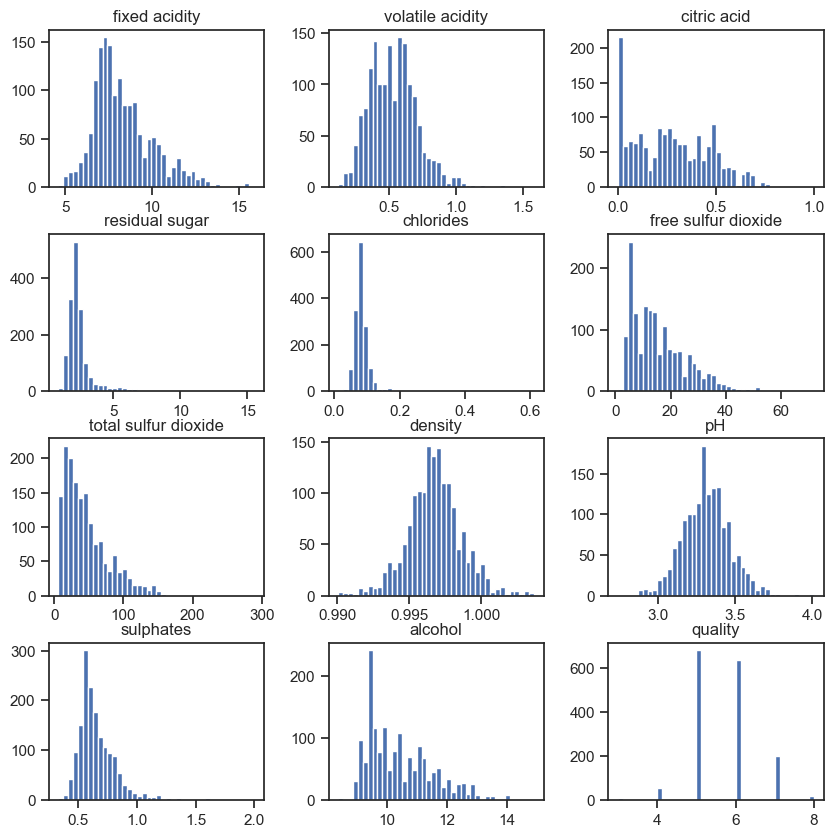

In [6]:
sns.set_theme(style="ticks")
histogramas = data.hist(bins = 40, figsize=(10,10), grid = False);

Notar que hay muy pocos vinos en las categorías 3, 4 y 8, esto podría ocacionar problemas en los modelos debido al desbalanceo de los datos.

### Cálculo y eliminación de outliers

![outliers](https://miro.medium.com/v2/resize:fit:720/0*BenFO7Hi0cLJA7_u)

In [7]:
def get_outliers(data):
    """ Los valores por debajo de minimum y por encima de maximum son considerados outliers"""
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    median = data.median()
    IQR = Q3-Q1
    maximum = Q3 + 1.5*IQR
    minimum = Q1 - 1.5*IQR
    return minimum, maximum

In [8]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 
            'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']
data_2 = data
for column in columns:
    minimum , maximum = get_outliers(data_2[column])
    threshold = 0.20 #Este threshold o umbral sirve para que se amplíe el rango donde los valores no se consideran outliers
    minimum *= (1 - threshold)
    maximum *= (1 + threshold)
    data_2 = data_2.loc[(data_2[column] > minimum) & 
                                            (data_2[column] < maximum)]

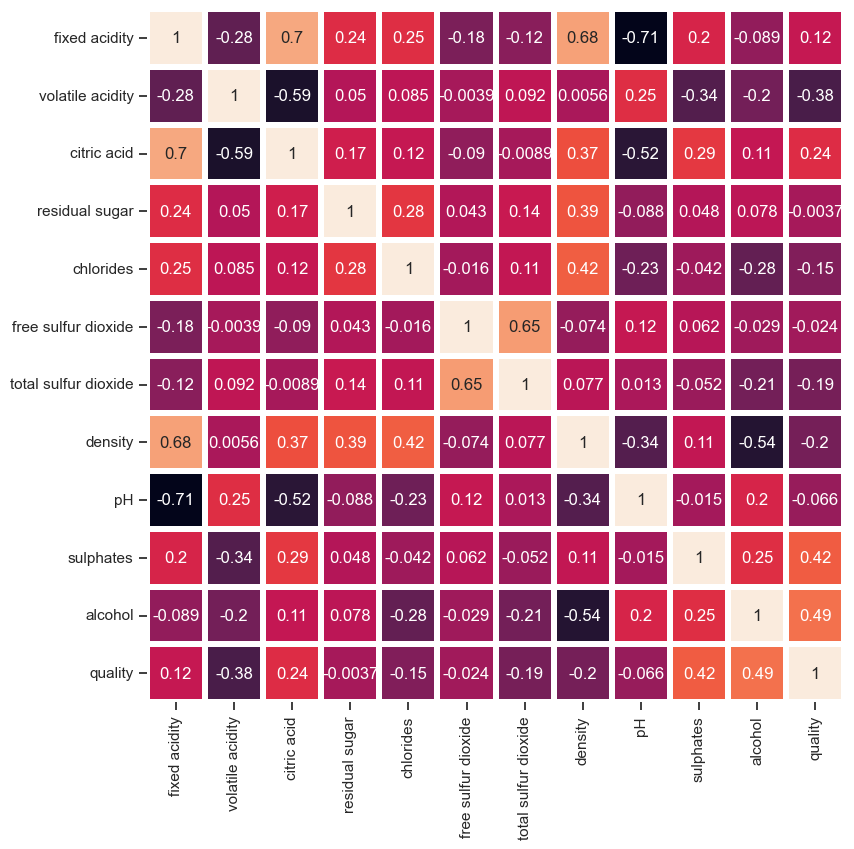

In [9]:
plt.figure(figsize = (9,9))
sns.heatmap(data_2.corr(), annot = True, cbar = False, linewidths = 4);

In [10]:
X = data_2[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides',  'total sulfur dioxide','free sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']]
y = data_2["quality"]         
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
#Se estandarizan los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

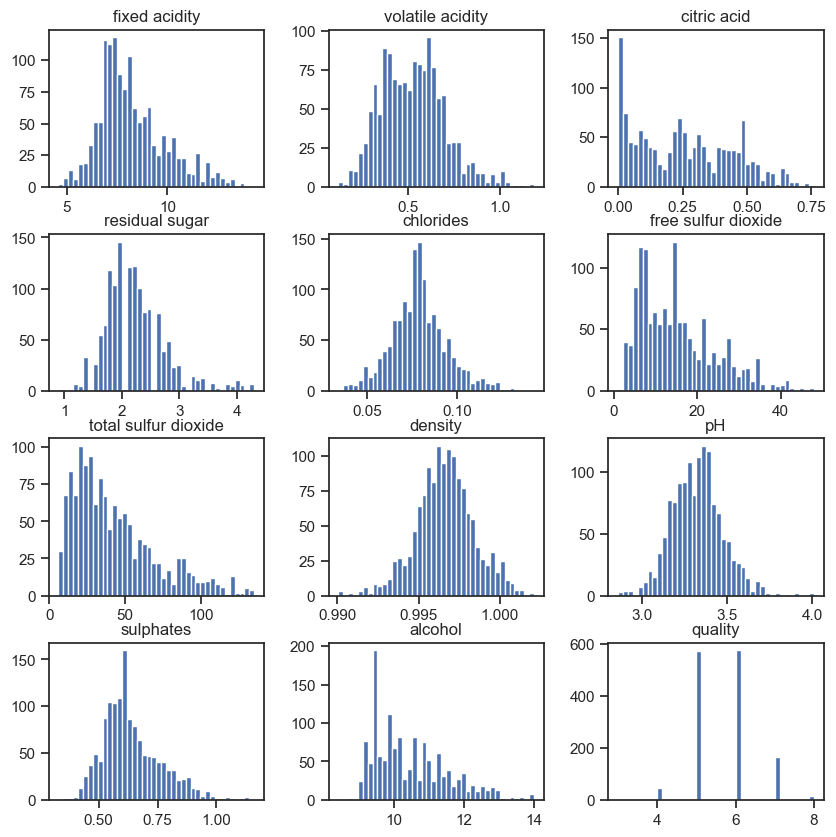

In [12]:
sns.set_theme(style="ticks")
histogramas = data_2.hist(bins = 40, figsize=(10,10), grid = False)

<a id="1"></a>

# 1.- Modelo de regresión lineal

Para los siguientes modelos de regresión se toma la hipótesis que la calidad del vino está dada por un número real.

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

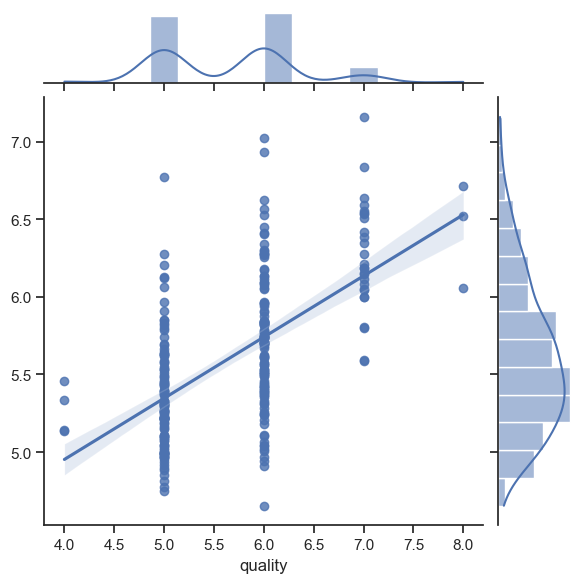

In [14]:
prediction_lin_reg = lin_reg.predict(X_test)
lin_reg_plot = sns.jointplot(x = y_test, y =  prediction_lin_reg, kind="reg");

In [15]:
lin_mse = mean_squared_error(y_test, prediction_lin_reg)
print(lin_mse)

0.3380516185580047


<a id="2"></a>
# 2.- Modelo de regresión con arbol de decisión (Decision Tree Regressor)


In [16]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

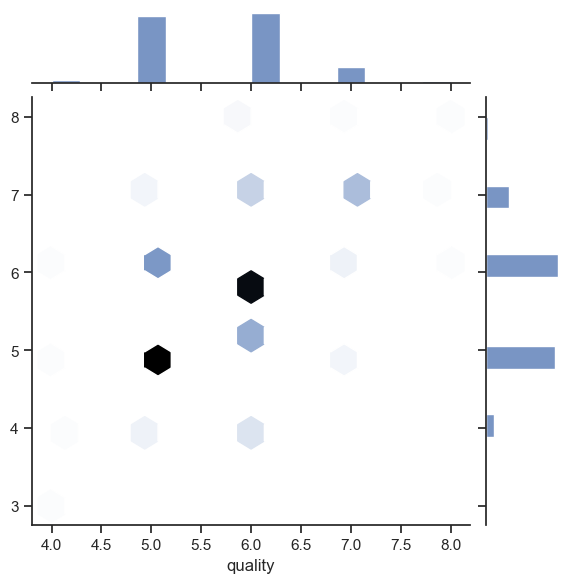

In [17]:
prediction_tree_reg = tree_reg.predict(X_test)
tree_reg_plot = sns.jointplot(y = prediction_tree_reg, x =  y_test, kind = "hex");

In [18]:
tree_reg_mse = mean_squared_error(y_test, prediction_tree_reg)
print(tree_reg_mse)

0.5471014492753623


<a id="3"></a>
# 3.- Modelo de regresión con bosque aleatorio


In [19]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

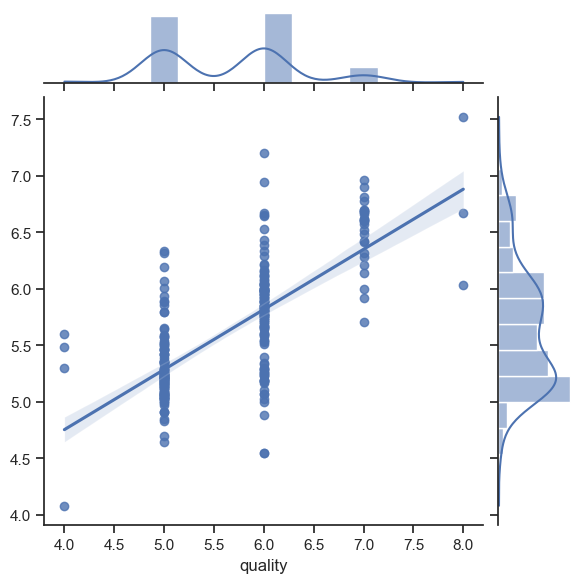

In [20]:
prediction_forest_reg = forest_reg.predict(X_test)
forest_reg_plot = sns.jointplot(y = prediction_forest_reg, x =  y_test, kind = "reg");

In [21]:
forest_reg_mse = mean_squared_error(y_test, prediction_forest_reg)
print(forest_reg_mse)

0.2573713768115942


Con este modelo se obtiene un muy buen resultado, con un MSE relativamente pequeño.

<a id="4"></a>
# 4.- Regresión con bosque aleatorio y búsqueda aleatoria


In [22]:
rf_grid = {"n_estimators": np.arange(10, 100, 5),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [1,2,5,10],
          }

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=4,
                              verbose=True)

In [23]:
rs_model.fit(X_train, y_train)

Fitting 4 folds for each of 2 candidates, totalling 8 fits


RandomizedSearchCV(cv=4,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [1, 2, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95])},
                   verbose=True)

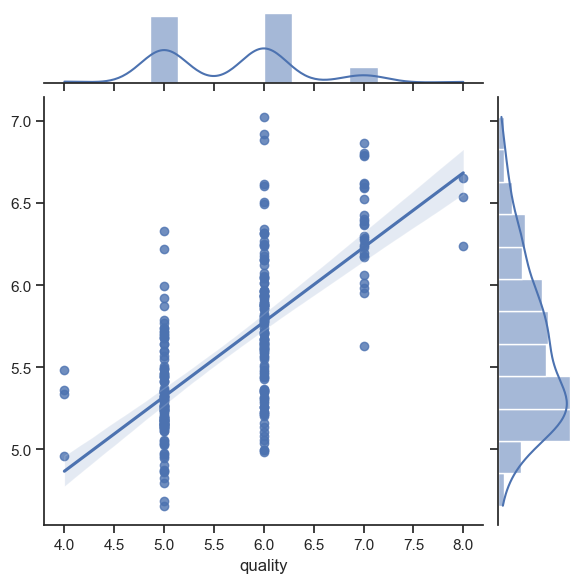

In [24]:
prediction_rs_model = rs_model.predict(X_test)
rs_model_plot = sns.jointplot(y = prediction_rs_model, x =  y_test, kind = "reg");

In [25]:
rs_model_mse = mean_squared_error(y_test, prediction_rs_model )
print(rs_model_mse)

0.2785408903380338


<a id="5"></a>
# 5.- Modelo de regresión logística


In [26]:
data_cat = data_2
data_cat["quality"].astype("category");

In [27]:
data_cat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [28]:
cat_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000, class_weight = "balanced")
cat_model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=10000,
                   multi_class='multinomial')

In [29]:
cat_model_prediction = cat_model.predict(X_test)

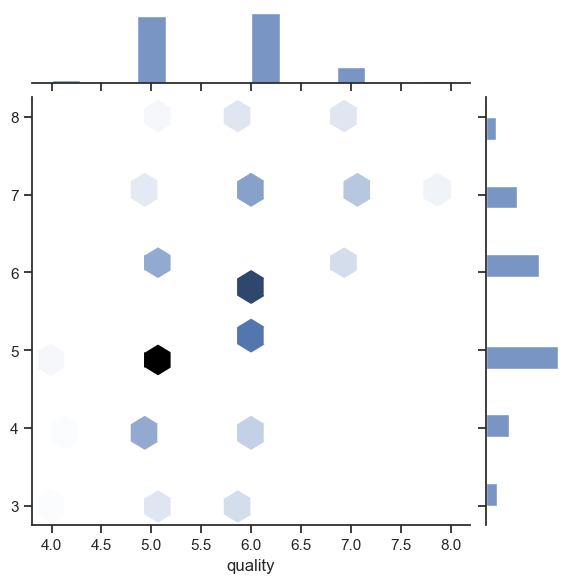

In [30]:
cat_model_plot = sns.jointplot(y = cat_model_prediction, x =  y_test, kind = "hex");

In [31]:
matriz = confusion_matrix(y_test, cat_model_prediction) 

[Text(0.5, 20.049999999999997, 'Predicción'), Text(47.25, 0.5, 'Valor real')]

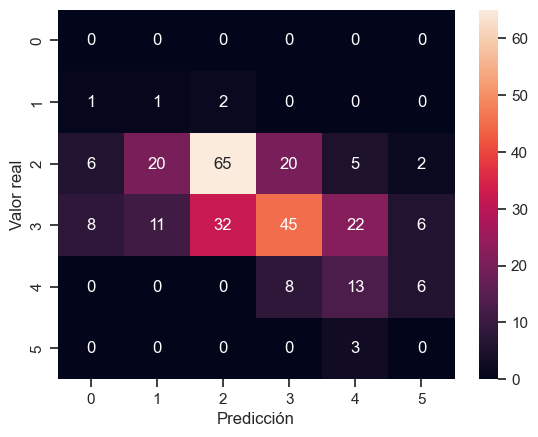

In [32]:
matriz_plot = sns.heatmap(matriz, annot = True)
matriz_plot.set(xlabel="Predicción", ylabel="Valor real")


In [33]:
precision = precision_score(y_test, cat_model_prediction, average='weighted')
recall = recall_score(y_test,cat_model_prediction, average='weighted', zero_division = 1)
f1 = f1_score(y_test, cat_model_prediction, average='weighted')

print(f'Precisión: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Precisión: 0.5876843997710343
Recall: 0.4492753623188406
F1-Score: 0.4985209568236174


A priori la precisión del modelo de regresión logística parece no tener buena precisión (%55), pero hay que tener en cuenta que para la mayoría de los vinos acierta el resultado o indica que el vino es una calidad inferior o superior, es decir por ejemplo, para un vino de calidad 2 el modelo tiene muy buena capacidad de indicar si se trata de un vino de calidad 2, 1 o 3, suponiendo una poca variación de calidad entre categorías.
                  Para un modelo de clasificación binario (vino bueno, vino malo) quizá sería mas preciso el modelo, pero no es el problema que se busca resolver.

<a id="6"></a>
# 6.- Clasificación con máquina de vectores de soporte (SVM)

In [34]:
svm_model = svm.SVC(kernel='rbf', C=15, gamma=1.5, class_weight='balanced')
smote = SMOTE(random_state=2,k_neighbors=1
             )
X_resampled, y_resampled = smote.fit_resample(X_train, y_train) #Transformación para datos desbalanceados
svm_model.fit(X_resampled, y_resampled)

SVC(C=15, class_weight='balanced', gamma=1.5)

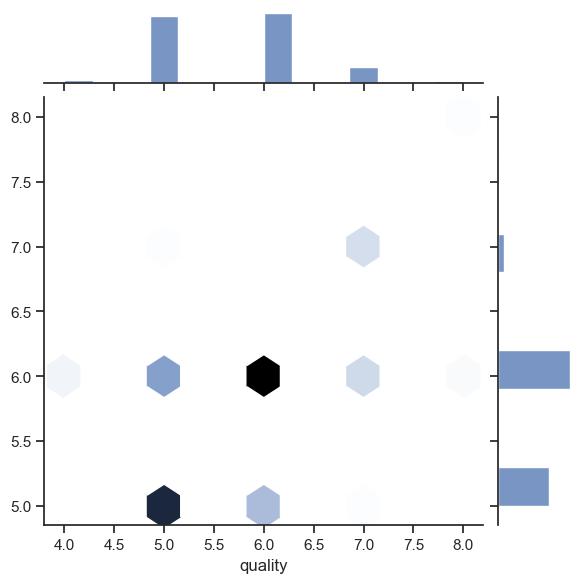

In [35]:
svm_prediction = svm_model.predict(X_test)
svm_plot = sns.jointplot(y = svm_prediction, x =  y_test, kind = "hex");

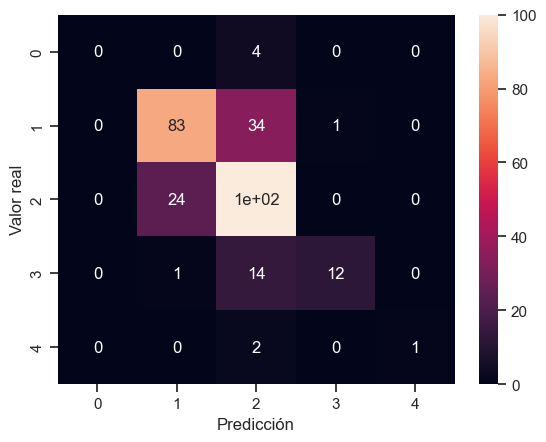

In [36]:
matriz_svm = confusion_matrix(y_test, svm_prediction) 
matriz_plot_svm = sns.heatmap(matriz_svm, annot = True)
matriz_plot_svm.set(xlabel="Predicción", ylabel="Valor real");

In [37]:
precision_vsm = precision_score(y_test, svm_prediction, average='weighted',zero_division = 1)
recall_vsm = recall_score(y_test,svm_prediction, average='weighted', zero_division = 1)
f1_vsm = f1_score(y_test, svm_prediction, average='weighted')

print(f'Precisión: {precision_vsm}')
print(f'Recall: {recall_vsm}')
print(f'F1-Score: {f1_vsm}')

Precisión: 0.7359700819845748
Recall: 0.7101449275362319
F1-Score: 0.7013811574826326


# Resultados:

#### Si tuviese que elegir un modelo elegiría sin dudas el SVM que logró una buena precisión con un buen puntaje F1. Estimo que se podrían mejorar los modelos con mas datos y con datos mas balanceados.